# Turbulence in celestial bodies

#### Jullian Williams

#### Problem: 
Artificial data can be created and tested for normality and other discriptive statistics. This code generates hdu data artificially and plots the PDF and log-normal distributions via turbustat. The PDF plots generated describe the normality and distribution properties of the artificial data.

In [2]:
#Avoid excess memory use
import dask.array as da
array = da.random.random((1000, 1000))
from astropy.io import fits

In [3]:
from turbustat.simulator import make_3dfield, make_ppv

In [4]:
from turbustat.io.sim_tools import create_fits_hdu

In [5]:
from turbustat.statistics import PowerSpectrum

In [6]:
from turbustat.statistics import StatMoments

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import astropy.units as u
from astropy.wcs import wcs

In [9]:
from astropy.utils.data import get_pkg_data_filename

In [10]:
from turbustat.simulator import make_extended
from turbustat.statistics import PDF

In [11]:
img1 = make_extended(1024, powerlaw=3.0, theta=0., ellip=1,  return_fft=False, full_fft=True, randomseed=32768324)
print(img1)
img1.size
img1.shape

[[0.31756241 0.54494802 0.63857113 ... 0.4994761  0.51687092 0.48536919]
 [0.56356306 0.42601805 0.54075945 ... 0.63503002 0.59079629 0.58034468]
 [0.63609664 0.61498016 0.59599377 ... 0.62264951 0.83473454 0.84567401]
 ...
 [0.47515603 0.40532298 0.35865825 ... 0.6863955  0.55220372 0.55571791]
 [0.34677997 0.14391113 0.31826282 ... 0.6996507  0.53045281 0.50254507]
 [0.20283654 0.40511993 0.43555304 ... 0.44419143 0.50084301 0.43643782]]


(1024, 1024)

In [12]:
img1_hdu = fits.PrimaryHDU(img1)
pixel_scale = 3 * u.arcsec
beamfwhm = 6 * u.arcsec
imshape = img1.shape
restfreq = 1.4 * u.GHz
bunit = u.K
yidhdu = create_fits_hdu(img1, pixel_scale, beamfwhm, imshape, restfreq,bunit) 
print(yidhdu.data)

[[0.31756241 0.54494802 0.63857113 ... 0.4994761  0.51687092 0.48536919]
 [0.56356306 0.42601805 0.54075945 ... 0.63503002 0.59079629 0.58034468]
 [0.63609664 0.61498016 0.59599377 ... 0.62264951 0.83473454 0.84567401]
 ...
 [0.47515603 0.40532298 0.35865825 ... 0.6863955  0.55220372 0.55571791]
 [0.34677997 0.14391113 0.31826282 ... 0.6996507  0.53045281 0.50254507]
 [0.20283654 0.40511993 0.43555304 ... 0.44419143 0.50084301 0.43643782]]


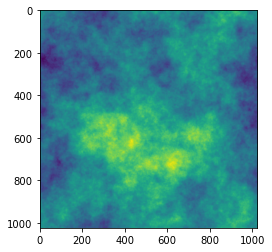

In [13]:
plt.imshow(yidhdu.data) 

Figure 1: The resultant 2-D array.

Optimization terminated successfully.
         Current function value: 1.821697
         Iterations: 21
         Function evaluations: 43
                              Likelihood Results                              
Dep. Variable:                      y   Log-Likelihood:            -9.1670e+05
Model:                     Likelihood   AIC:                         1.833e+06
Method:            Maximum Likelihood   BIC:                         1.833e+06
Date:                Thu, 08 Apr 2021                                         
Time:                        17:05:35                                         
No. Observations:              503211                                         
Df Residuals:                  503209                                         
Df Model:                           2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

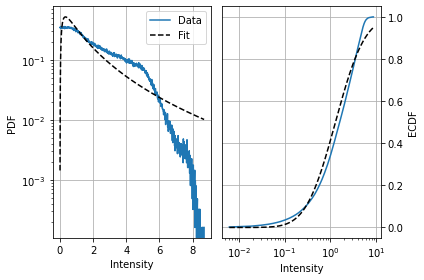

In [20]:
pdf_0 = PDF(yidhdu, min_val=0.0, bins=None)  
pdf_0.run(verbose=True, fit_type='mle')

Graph 1: MLE fitting of data.

In [28]:
#Just checking percentiles
pdf_0.find_at_percentile(95) 

5.115800604753073

## Normalizing the data

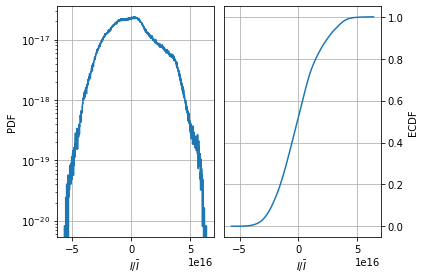

In [75]:
pdf_1 = PDF(yidhdu, normalization_type='normalize_by_mean')  
pdf_1.run(verbose=True, do_fit=False)

Normalizing the data displays a PDF that suggests the data is largely bi-modal. Figure 1 shows an image with 2 bright spots in the image. The PDF displays this property in its bimodal distribution at the peaks at ~ 0 and ~ 4. The plateau at ~ 0 accounts for the broad area with high intensities in the figure. If this artificial image was a snapshot of an area in space, these high intensity regions could be stars, planetary bodies or other celestial bodies in space.

In [ ]:
import scipy.stats as stats  
HDU_YD = stats.pareto.rvs(2, size=5000)  
pdf_YHDU = PDF(yidhdu, min_val=0.0, normalization_type=None, bins=100)  
pdf_YHDU.run(verbose=True, model=stats.pareto,
             fit_type='mcmc', floc=False)  

The maximum liklihood estimator works well because it is parametric data.
Using the monte carlo fitting revealed that there was no co-variance between the paramters in the fit (2D). 
The fitted PDF shows a positively skewed distribution. 

In [ ]:
pdf_YHDU.trace_plot()  

# Plotting the PDF in a manual scope

Here, we would like to just check on what a multi-dimentional array would look like with a Monte Carlo fitting technique. This fitting is typically used with non-parametric data whose standard errors are largely under-represented by a maximum liklihood estimator because of non-parametric data. A corner plot is used to display the distribution between them.

#pip install emcee

#pip install corner

In [43]:
import emcee
import corner

In [65]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

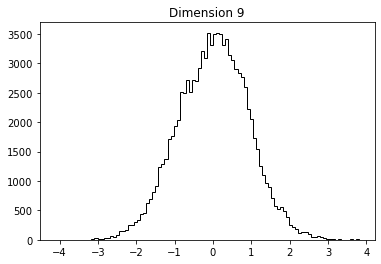

In [50]:
def lnprob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)
ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
sampler.run_mcmc(p0, 1000)
for i in range(ndim):
    plt.figure()
plt.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
plt.title("Dimension {0:d}".format(i))
plt.show()

In [51]:
print("Mean acceptance fraction: {0:.3f}"
.format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.417


In [52]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534
# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

In [53]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [54]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [55]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

In [56]:
def lnprior(theta):
    m, b, lnf = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < lnf < 1.0:
        return 0.0
    return -np.inf

In [57]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [58]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [59]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(x, y, yerr))

In [ ]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
truths=[m_true, b_true, np.log(f_true)])
sampler.run_mcmc(pos, 500)

(45000, 3)

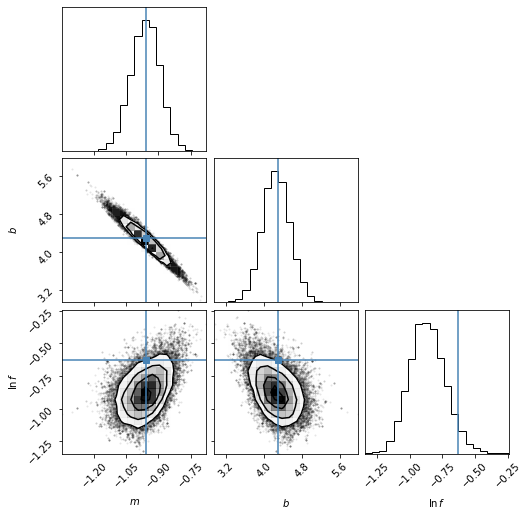

In [63]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
import corner
fig = corner.corner(samples, labels=["$m$", "$b$", "$\ln\,f$"],
truths=[m_true, b_true, np.log(f_true)])
samples.size
samples.shape

The corner plots show the marginalized distributions for the intercept, slope and f (ln) independently in the histograms across the diagonals.

In [69]:
print (m_true,b_true, np.log(f_true))

-0.9594 4.294 -0.6273594400219421


The sample slope and intercept are both centered around the mean while lnf is centered in the upper percentiles (sigma 1-2-3).

This is expected, since the slope and intercept are constants while the lnf value is a dependent variable, which varies as the independent (randomly generated x values) vary. For any linear relationship, the slope and intercept should be normally distributed amongst the sampled values.

# References

EMCEE. (2021). Retrieved 5 April 2021, from https://readthedocs.org/projects/emcee/downloads/pdf/v2.2.1/

PDF — turbustat v1.3.dev16+g354d02e. (2021). Retrieved 5 April 2021, from https://turbustat.readthedocs.io/en/latest/tutorials/statistics/pdf_example.html#overview